### Euler-Bernoulli model for internal constraints

In [1]:
# Importing libraries
import sympy as smp
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
def solver(boundary, E_, L_, I_, p0_, a_):

    # Defining variables
    z1, z2 = smp.symbols("z_1 z_2", real = True, nonnegative = True)

    # Defining constants
    E, L, I, p0, a = smp.symbols("E L I p_0 alpha", real = True, positive = True, constant = True)

    # Defining integration constants
    C1, C2, C3, C4, C5, C6, C7, C8 = smp.symbols("C1:9", real = True)
    
    # Defining deflection equations for both segments
    u1 = C1 + C2 * z1 + C3 * z1**2 + C4 * z1**3 + p0 * z1**4 / (24 * E * I)
    u2 = C5 + C6 * z2 + C7 * z2**2 + C8 * z2**3 + p0 * z2**4 / (24 * E * I)

    if boundary == 'fixed-simple-fixed':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 1).subs(z2, L - a * L), 0)
            
        eq5 = smp.Eq(u1.subs(z1, a * L), 0)                 
        eq6 = smp.Eq(u2.subs(z2, 0), 0)                      
        eq7 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, a * L),   
                     smp.diff(u2, z2, 1).subs(z2, 0))
        eq8 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L),    
                     smp.diff(u2, z2, 2).subs(z2, 0))
    
    if boundary == 'fixed-simple-simple':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 2).subs(z2, L - a * L), 0)

        eq5 = smp.Eq(u1.subs(z1, a * L), 0)                 
        eq6 = smp.Eq(u2.subs(z2, 0), 0)                      
        eq7 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, a * L),   
                     smp.diff(u2, z2, 1).subs(z2, 0))
        eq8 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L),    
                     smp.diff(u2, z2, 2).subs(z2, 0))
        
    if boundary == 'fixed-guided-fixed':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 1).subs(z2, L - a * L), 0)
            
        eq5 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, a * L),
                     smp.diff(u2, z2, 1).subs(z2, 0))                 
        eq6 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L),
                     smp.diff(u2, z2, 2).subs(z2, 0))                
        eq7 = smp.Eq(smp.diff(u1, z1, 3).subs(z1, a * L), 0)
        eq8 = smp.Eq(smp.diff(u2, z2, 3).subs(z2, 0), 0)

    if boundary == 'simple-guided-fixed':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 1).subs(z2, L - a * L), 0)
            
        eq5 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, a * L),
                     smp.diff(u2, z2, 1).subs(z2, 0))                 
        eq6 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L),
                     smp.diff(u2, z2, 2).subs(z2, 0))                
        eq7 = smp.Eq(smp.diff(u1, z1, 3).subs(z1, a * L), 0)
        eq8 = smp.Eq(smp.diff(u2, z2, 3).subs(z2, 0), 0)
        
    if boundary == 'fixed-hinged-fixed':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 1).subs(z2, L - a * L), 0)
            
        eq5 = smp.Eq(u1.subs(z1, a * L),
                     u2.subs(z2, 0))                 
        eq6 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L), 0)               
        eq7 = smp.Eq(smp.diff(u2, z2, 2).subs(z2, 0), 0)
        eq8 = smp.Eq(smp.diff(u1, z1, 3).subs(z1, a * L),
                     smp.diff(u2, z2, 3).subs(z2, 0))
        
    if boundary == 'fixed-hinged-simple':
        # Boundary conditions
        eq1 = smp.Eq(u1.subs(z1, 0), 0)           
        eq2 = smp.Eq(smp.diff(u1, z1, 1).subs(z1, 0), 0)

        eq3 = smp.Eq(u2.subs(z2, L - a * L), 0)              
        eq4 = smp.Eq(smp.diff(u2, z2, 2).subs(z2, L - a * L), 0)
            
        eq5 = smp.Eq(u1.subs(z1, a * L),
                     u2.subs(z2, 0))                 
        eq6 = smp.Eq(smp.diff(u1, z1, 2).subs(z1, a * L), 0)               
        eq7 = smp.Eq(smp.diff(u2, z2, 2).subs(z2, 0), 0)
        eq8 = smp.Eq(smp.diff(u1, z1, 3).subs(z1, a * L),
                     smp.diff(u2, z2, 3).subs(z2, 0))
        
    # Solving system of equations
    eq = [eq1, eq2, eq3, eq4, eq5, eq6, eq7, eq8]
    sol = smp.solve(eq, (C1, C2, C3, C4, C5, C6, C7, C8))
        
    # Solutions
    u1 = u1.subs(sol).factor()
    u2 = u2.subs(sol).factor()
    
    # Computing derived quantities
    theta1 = - smp.diff(u1, z1, 1).factor()
    theta2 = - smp.diff(u2, z2, 1).factor()
    M1 = - E * I * smp.diff(u1, z1, 2).factor()
    M2 = - E * I * smp.diff(u2, z2, 2).factor()
    F1 = smp.diff(M1, z1, 1).factor()
    F2 = smp.diff(M2, z2, 1).factor()
    
    # Creating numerical functions
    u1_num = smp.lambdify([E, L, I, p0, a, z1], u1, 'numpy')
    u2_num = smp.lambdify([E, L, I, p0, a, z2], u2, 'numpy')
    theta1_num = smp.lambdify([E, L, I, p0, a, z1], theta1, 'numpy')
    theta2_num = smp.lambdify([E, L, I, p0, a, z2], theta2, 'numpy')
    M1_num = smp.lambdify([E, L, I, p0, a, z1], M1, 'numpy')
    M2_num = smp.lambdify([E, L, I, p0, a, z2], M2, 'numpy')
    F1_num = smp.lambdify([E, L, I, p0, a, z1], F1, 'numpy')
    F2_num = smp.lambdify([E, L, I, p0, a, z2], F2, 'numpy')
    
    # Creating coordinate arrays
    z1_vals = np.linspace(0, a_ * L_, 1000)
    z2_vals = np.linspace(0, L_ - a_ * L_, 1000)
    z2_global = z2_vals + a_ * L_  # Shift to global coordinates
    
    # Computing numerical values
    u1_vals = u1_num(E_, L_, I_, p0_, a_, z1_vals)
    u2_vals = u2_num(E_, L_, I_, p0_, a_, z2_vals)
    theta1_vals = theta1_num(E_, L_, I_, p0_, a_, z1_vals)
    theta2_vals = theta2_num(E_, L_, I_, p0_, a_, z2_vals)
    M1_vals = M1_num(E_, L_, I_, p0_, a_, z1_vals)
    M2_vals = M2_num(E_, L_, I_, p0_, a_, z2_vals)
    F1_vals = F1_num(E_, L_, I_, p0_, a_, z1_vals)
    F2_vals = F2_num(E_, L_, I_, p0_, a_, z2_vals)
    
    # Creating 2x2 plot grid
    fig, axs = plt.subplots(2, 2, figsize = (14, 10))
    fig.suptitle(f'Beam Analysis', fontsize = 16)
    
    # Plotting deflection
    axs[0, 0].plot(z1_vals, u1_vals, 'b-', linewidth = 2)
    axs[0, 0].plot(z2_global, u2_vals, 'r-', linewidth = 2)
    axs[0, 0].set_title('Deflection')
    axs[0, 0].set_ylabel('Deflection (m)')
    axs[0, 0].grid(True, linestyle = '--', alpha = 0.7)
    
    # Plotting rotation
    axs[0, 1].plot(z1_vals, theta1_vals, 'b-', linewidth = 2)
    axs[0, 1].plot(z2_global, theta2_vals, 'r-', linewidth = 2)
    axs[0, 1].set_title('Rotation')
    axs[0, 1].set_ylabel('Rotation (rad)')
    axs[0, 1].grid(True, linestyle = '--', alpha = 0.7)
    
    # Plotting bending moment
    axs[1, 0].plot(z1_vals, M1_vals, 'b-', linewidth = 2)
    axs[1, 0].plot(z2_global, M2_vals, 'r-', linewidth = 2)
    axs[1, 0].set_title('Bending Moment')
    axs[1, 0].set_ylabel('Moment (N·m)')
    axs[1, 0].set_xlabel('Position (m)')
    axs[1, 0].grid(True, linestyle = '--', alpha = 0.7)
    
    # Plotting shear force
    axs[1, 1].plot(z1_vals, F1_vals, 'b-', linewidth = 2)
    axs[1, 1].plot(z2_global, F2_vals, 'r-', linewidth = 2)
    axs[1, 1].set_title('Shear Force')
    axs[1, 1].set_ylabel('Shear (N)')
    axs[1, 1].set_xlabel('Position (m)')
    axs[1, 1].grid(True, linestyle = '--', alpha = 0.7)
    
    # Adding support markers to all plots
    for i in range(2):
        for j in range(2):
            axs[i, j].axvline(x = 0, color = 'k', linewidth = 1.5, linestyle = '--')
            axs[i, j].axvline(x = a_ * L_, color = 'orange', linewidth = 1.5, linestyle = '--')
            axs[i, j].axvline(x = L_, color = 'k', linewidth = 1.5, linestyle = '--')
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.94)
    plt.show()

In [3]:
# Parameters
E = 30
L = 20
I = 15
p0 = 10
a = 1 / 2

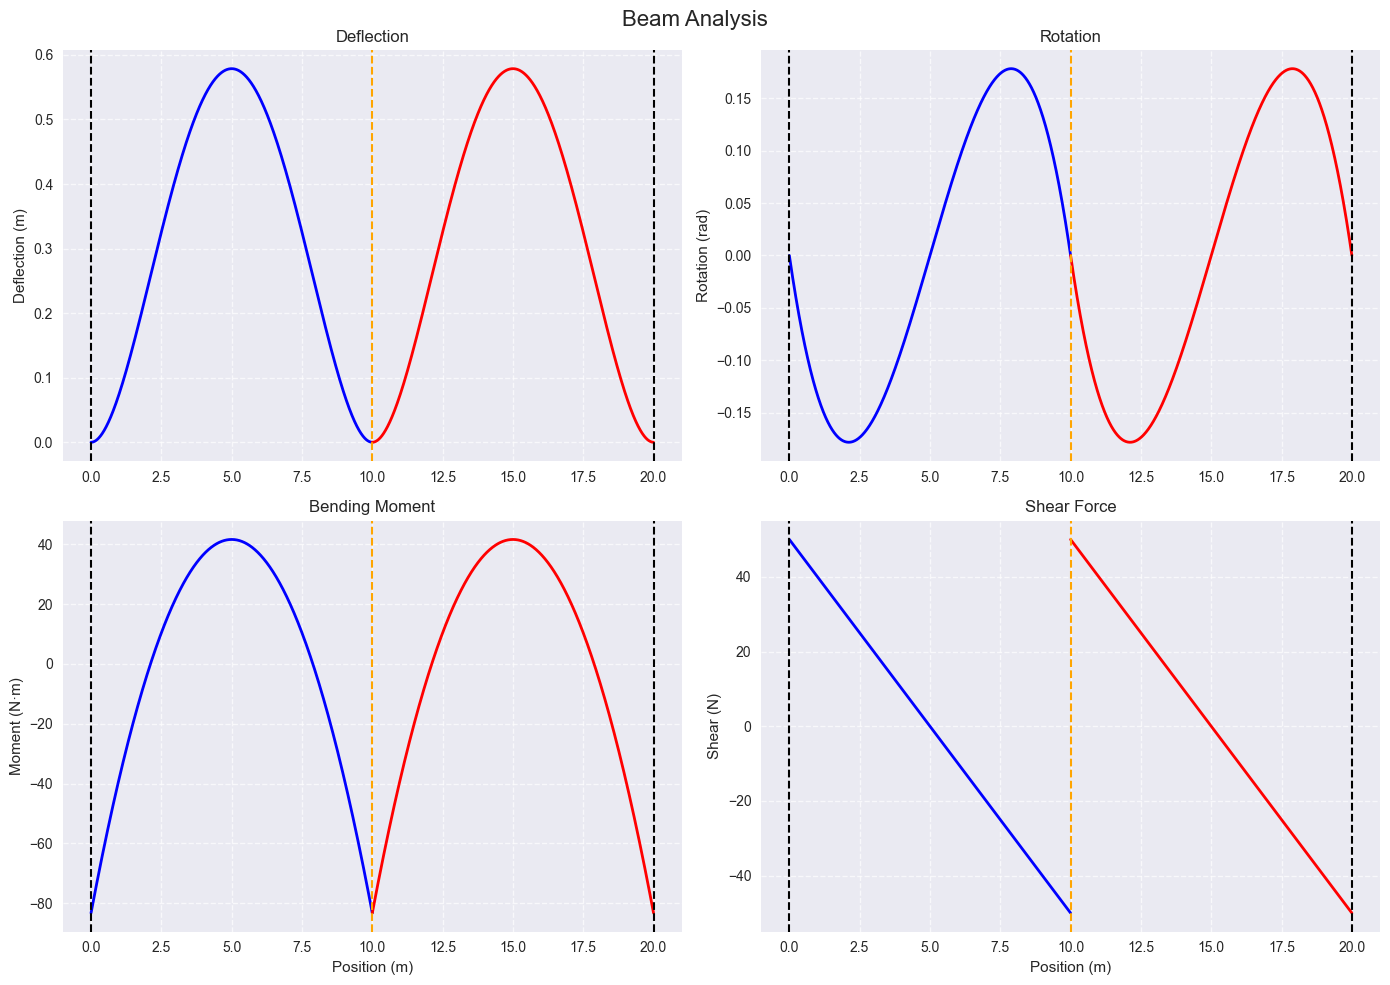

In [4]:
solver('fixed-simple-fixed', E, L, I, p0, a)

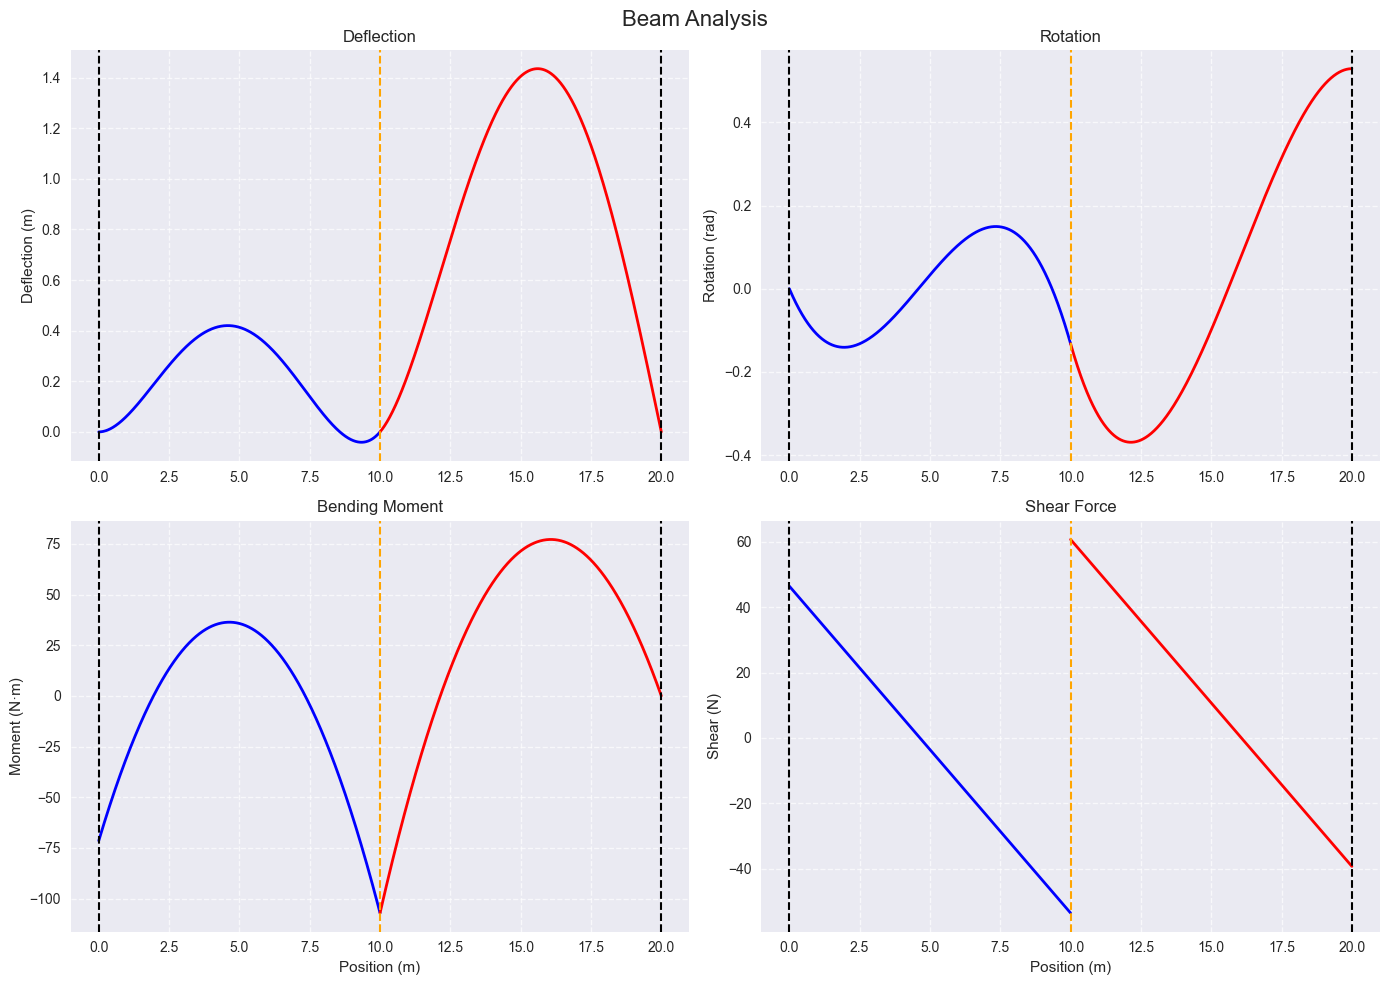

In [5]:
solver('fixed-simple-simple', E, L, I, p0, a)

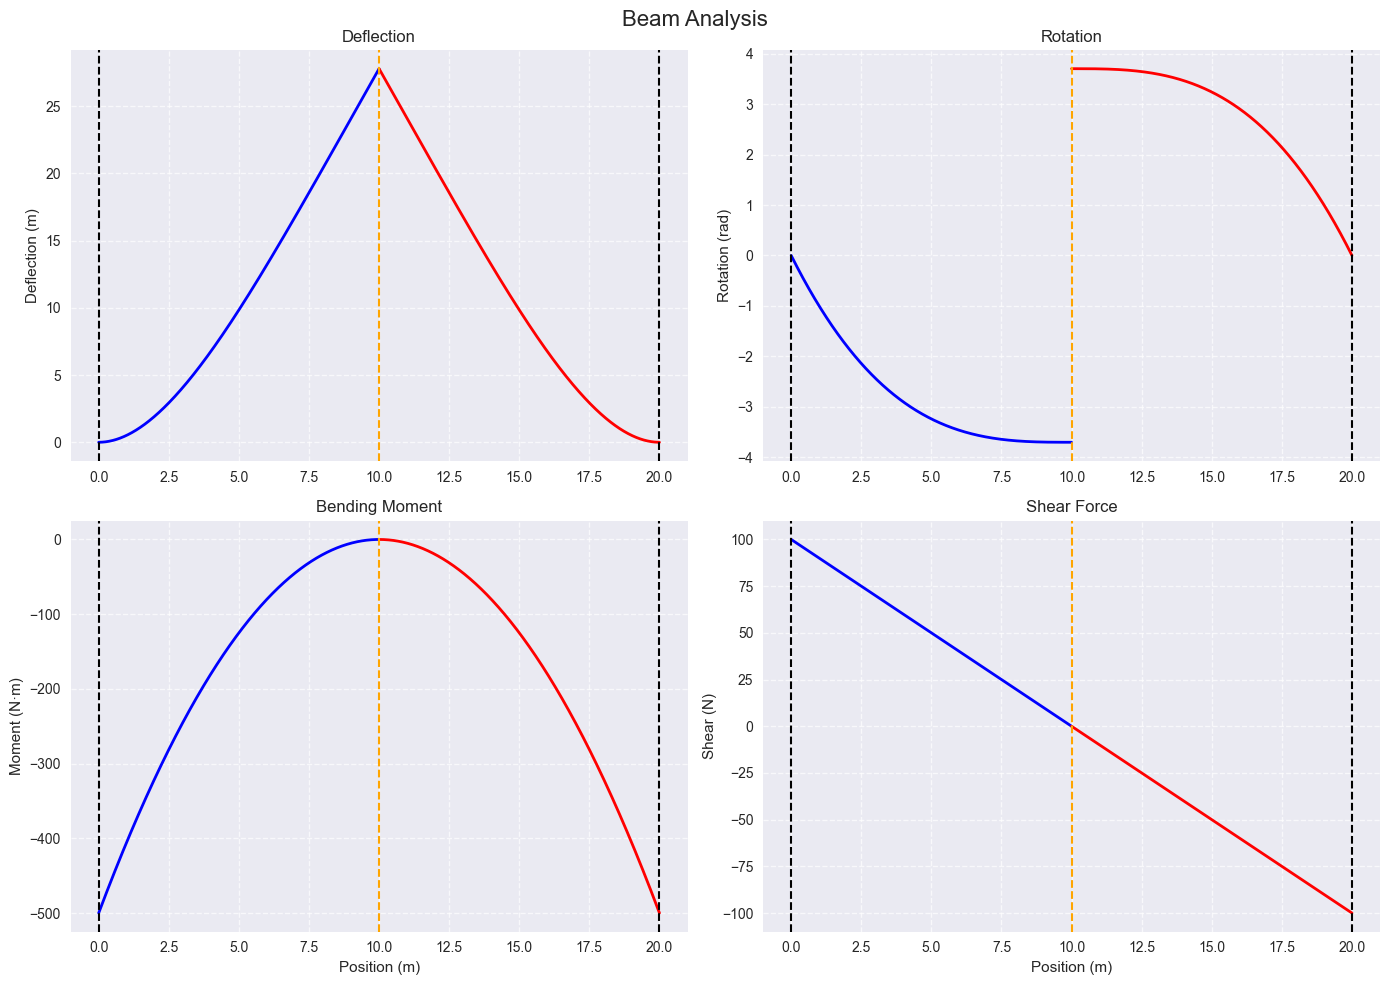

In [6]:
solver('fixed-hinged-fixed', E, L, I, p0, a)

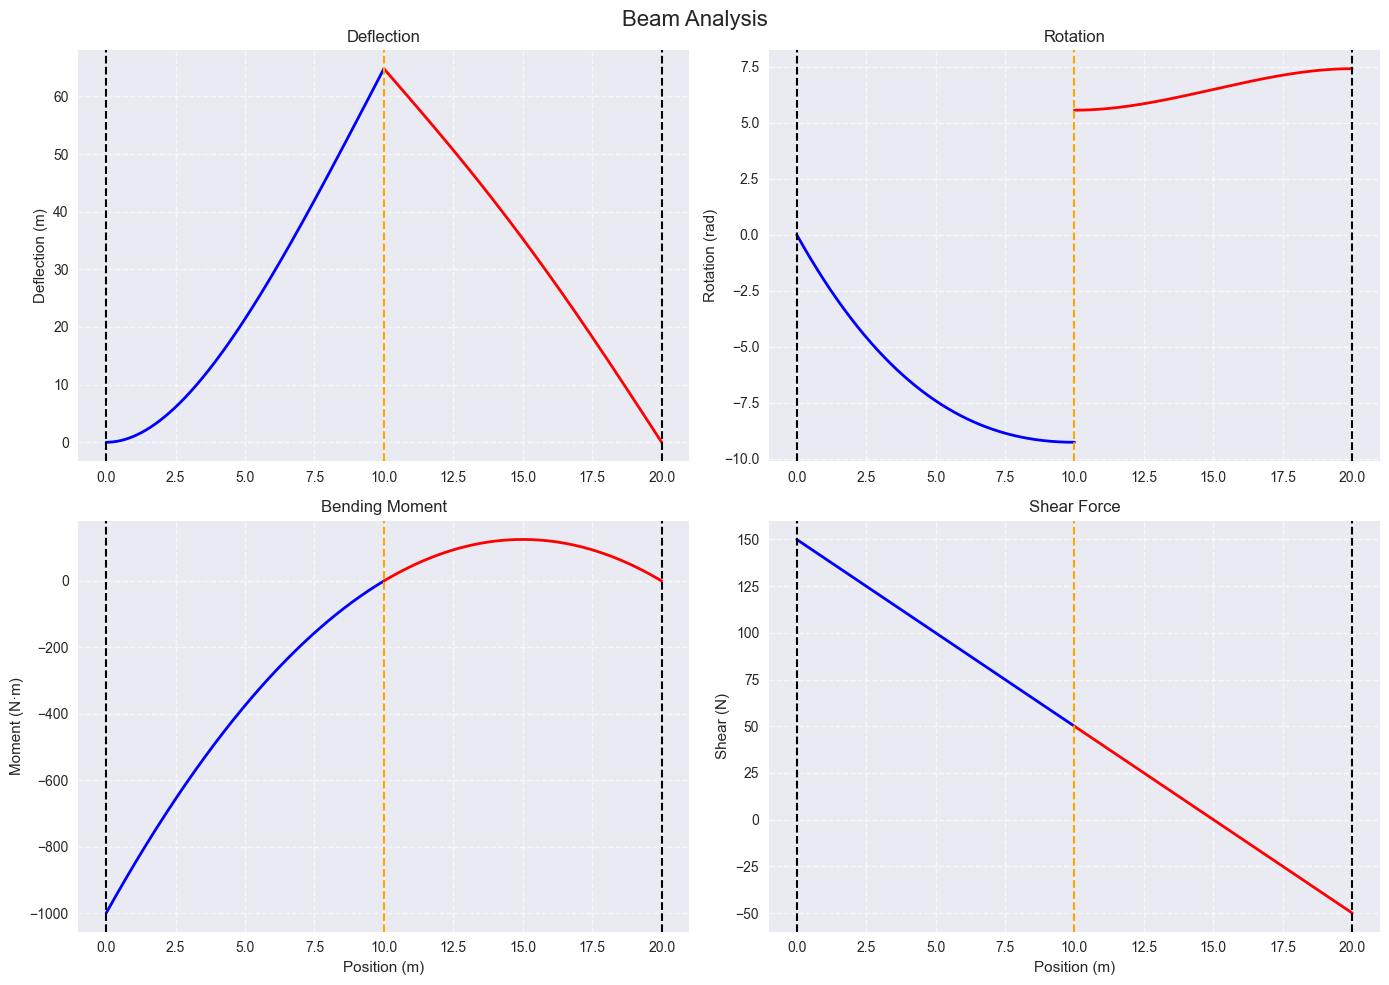

In [7]:
solver('fixed-hinged-simple', E, L, I, p0, a)

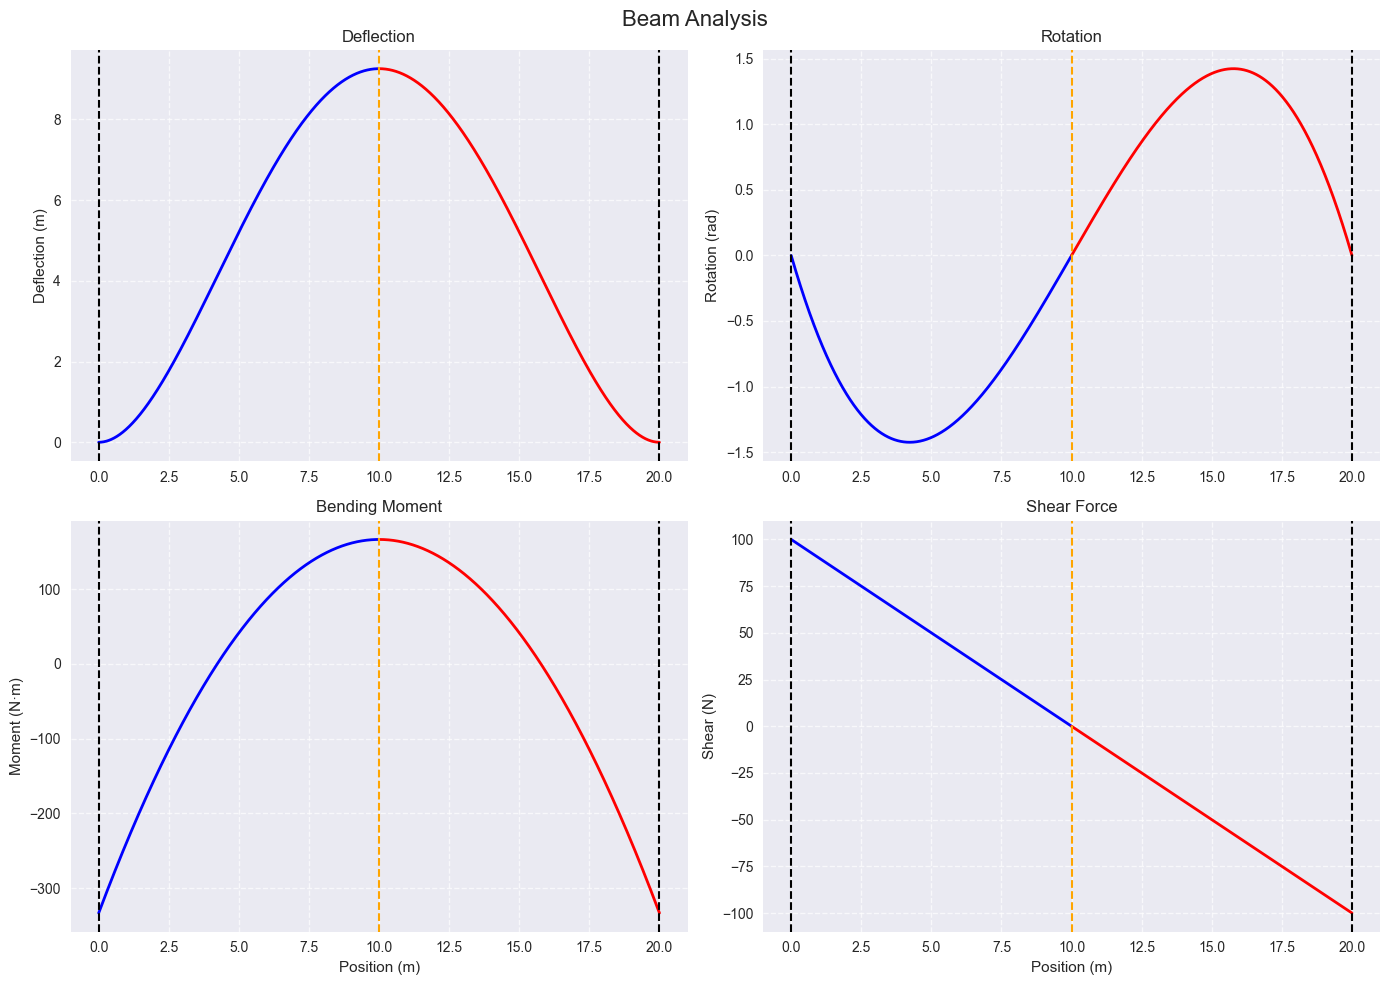

In [8]:
solver('fixed-guided-fixed', E, L, I, p0, a)

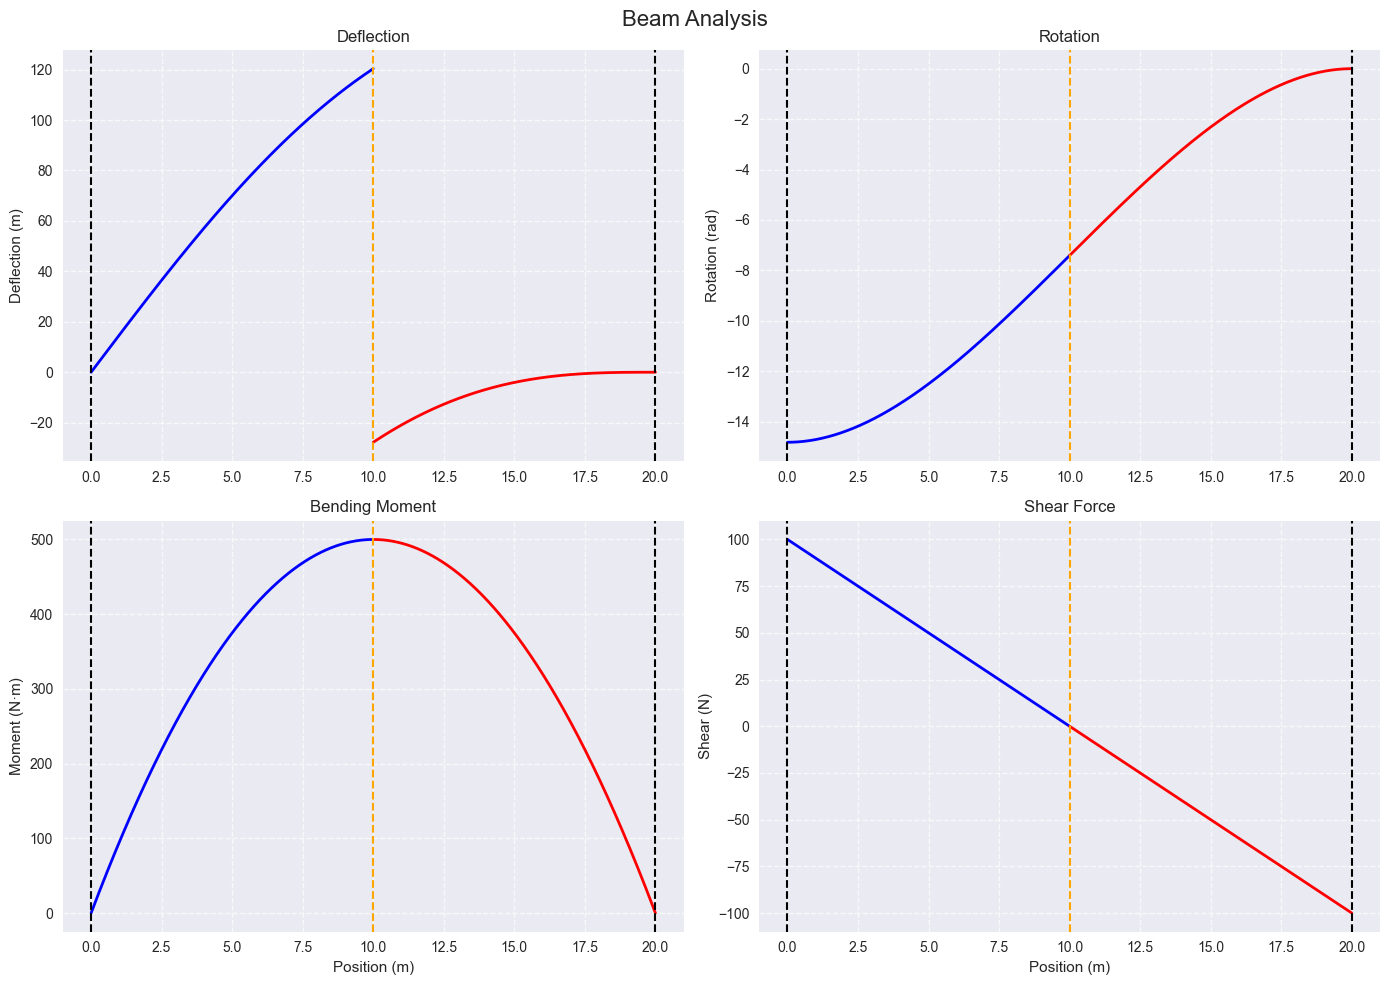

In [9]:
solver('simple-guided-fixed', E, L, I, p0, a)